In [1]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
from IPython import display
from PIL import Image
import scipy.signal as signal

%matplotlib inline

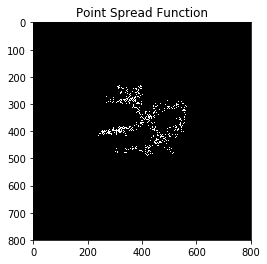

In [2]:
# get point spread function
psf = np.asarray(Image.open('psf.png').convert('L'))
psf = np.pad(psf, 200, mode='constant')
plt.imshow(psf, cmap = 'gray')
_ = plt.title('Point Spread Function')

[[461 422]
 [714 110]
 [607  21]
 [  0 364]
 [762 768]]


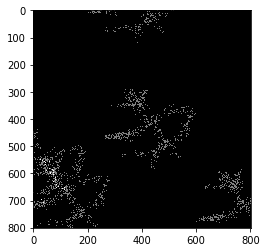

In [6]:
num_points = 5

# generate light source with num_points
v = np.zeros((800,800))
points = np.random.randint(low=0, high=800, size=(num_points,2))
print(points)
for point in points:
    v[tuple(point)] = 1
    
# convolve light source with psf
psf_pad = np.pad(psf, 400, mode='constant')
v_pad = np.pad(v, 400, mode='constant')
_ = plt.imshow(psf_pad, cmap='gray')

PSF_PAD = np.fft.fft2(np.fft.ifftshift(psf_pad))
V_PAD = np.fft.fft2(np.fft.ifftshift(v_pad))
B = PSF_PAD * V_PAD

b = np.fft.fftshift(np.fft.ifft2(B))
b = np.abs(b)[400:1201, 400:1201]
_ = plt.imshow(b, cmap='gray')

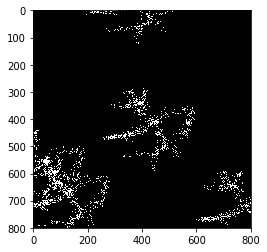

In [10]:
# sig_b = signal.fftconvolve(v_pad, psf_pad, mode='same')
# sig_b = np.abs(sig_b)[400:1201, 400:1201]
sig_b = signal.fftconvolve(v, psf, mode='same')
sig_b = np.abs(sig_b).astype('uint8')
_ = plt.imshow(sig_b, cmap='gray')

[[  0   0   0   0   0   0 255   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0 255   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 254]
 [255 254   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0 255   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0 255   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

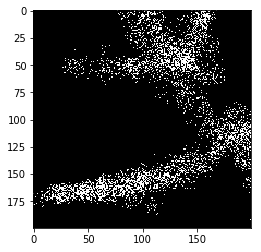

In [9]:
sig_b_sub = sig_b[600:801,600:801].astype('uint8')
_ = plt.imshow(sig_b_sub, cmap='gray')
print(sig_b_sub[175:, 0:20])